Types of Recommender systems: 
There are two major approaches to build a recommender system 
 - Content-Based Filtering 
 - Collabartive Filtering

Content-Based Filtering :
    Similarity between movies is based on Genres, the actors in the movies, the director of the movies etc
    ex : Netflix

Collabarative based Filtering:
    It leverages the power of crowd. 
    Example: If the user A likes items X and Y 
             and if user B likes items X then there is a fair bit chance that he will also like item Y
    ex: Amazon

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.join("movie_lens")
ratings_path = os.path.join(data_path,"ratings.csv")
movie_names_path = os.path.join(data_path,"movies.csv")
print(data_path)
print(movie_names_path)

movie_lens
movie_lens\movies.csv


In [3]:
ratings_data=pd.read_csv(ratings_path)
print(ratings_data.shape)
ratings_data.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_names=pd.read_csv(movie_names_path)
print(movie_names.shape)
movie_names.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [6]:
type(movie_names)

pandas.core.frame.DataFrame

In [7]:
type(ratings_data)

pandas.core.frame.DataFrame

In [8]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
ratings_data.shape

(100836, 4)

In [10]:
movie_names.shape

(9742, 3)

In [11]:
movie_data=pd.merge(ratings_data,movie_names,on='movieId')
movie_data[210:].head(10)

,userId,movieId,rating,timestamp,title,genres
210,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
214,610,1,5.0,1479542900,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
216,6,3,5.0,845554296,Grumpier Old Men (1995),Comedy|Romance
217,19,3,3.0,965707636,Grumpier Old Men (1995),Comedy|Romance
218,32,3,3.0,856736172,Grumpier Old Men (1995),Comedy|Romance
219,42,3,4.0,996221045,Grumpier Old Men (1995),Comedy|Romance


In [12]:
movie_data['rating'].value_counts().sort_values(ascending=False)


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [13]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [14]:
#Problem: A movie can reach to the top even if a single user gives a rating of 5.0 to a movie. (5.0 / 1) = 5.0
#Normally, a movie can be really good if large number of users give a higher rating. We shall see the count also 


In [15]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [16]:
# now we can see some good movies with large no of users

In [17]:
ratings_mean_count=pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [18]:
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [19]:
# a new column in this data frame by name ['ratings_count']
ratings_mean_count['ratings_count']=pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [20]:
ratings_mean_count.head(10)

,rating,ratings_count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [21]:
ratings_mean_count.sort_values(by=['ratings_count'],ascending=False).head()

,rating,ratings_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [22]:
import seaborn as sns
sns.set_style('dark')

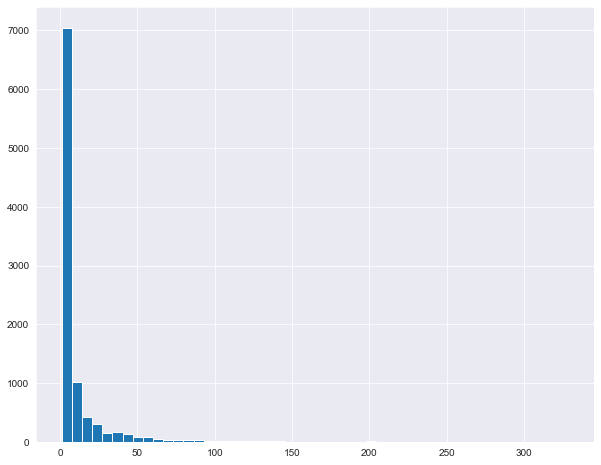

In [23]:
plt.figure(figsize=(10,8))

ratings_mean_count['ratings_count'].hist(bins=50)
plt.rcParams['patch.force_edgecolor'] = True  

 #sns.distplot(ratings_mean_count['ratings_count'],bins=50,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

In [24]:
# From the output, most of the movies have received less than 50 ratings. 
# While the number of movies having more than 100 ratings is very low.

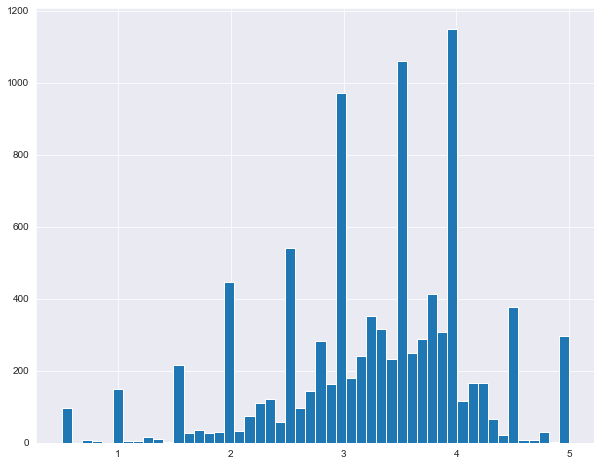

In [25]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50)
plt.show()

In [26]:
# we can see that the integer values have taller bars than the float values since most of the users
# rate with numbers like 1,2 ,3 4, 5 etc

In [27]:
# The data has a weak normal distribution with the mean of 3.5. There are few outliers
# Movies with higher number of ratings usually have higher ratings as well.

<Figure size 864x720 with 0 Axes>

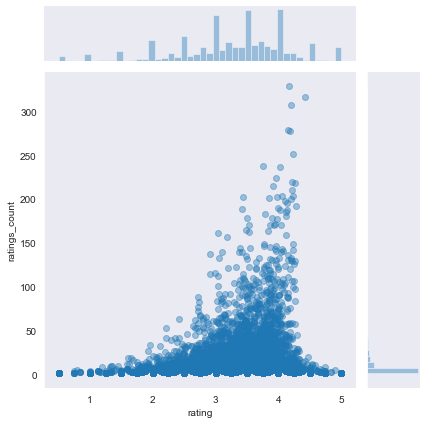

In [28]:
plt.figure(figsize=(12,10))
plt.rcParams['patch.force_edgecolor'] = True  
#ratings_mean_count['rating'].hist(bins=50)
sns.jointplot(x='rating', y='ratings_count', data=ratings_mean_count, alpha=0.4)  
plt.show()

# Finding similarities between Movies

In [29]:
# We will use correlation between the ratings of a movie as the similarity metric
# create a matrix of movie titles and corresponding user ratings

# There will be so many null values as all movies are not watched by everyone

In [30]:
user_movie_ratings=movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# from above
ratings_mean_count.sort_values(by=['ratings_count'],ascending=False).head(10)

,rating,ratings_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [32]:
# we will try to find movies similar to 'Forrest Gump(1994)' which is highly rated my maximum users

In [33]:
forrest_gump_rating=user_movie_ratings['Forrest Gump (1994)']
print(forrest_gump_rating.count())  # 329 users gave rating to the movie
print(forrest_gump_rating.mean())   # 4.164 is the mean of the ratings given by all users


329
4.164133738601824


In [34]:
forrest_gump_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [35]:
forrest_gump_rating.dropna().head()

userId
1     4.0
6     5.0
7     5.0
8     3.0
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [36]:
# Now we can retrieve all the movies similar to "Forrest Gump" using "corrwith" function


In [37]:
movies_like_forrest_gump=user_movie_ratings.corrwith(forrest_gump_rating)

C:\Users\SonyTF\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SonyTF\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [38]:
#corr_with_forrest_gump=correlated_with_forrest_gump
corr_with_forrest_gump = pd.DataFrame(movies_like_forrest_gump, columns=['Correlation'])  

In [39]:
corr_with_forrest_gump.head()

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN


In [40]:
corr_with_forrest_gump.dropna().head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [41]:
corr_with_forrest_gump.dropna().sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


In [42]:
# we can say that highly correlated movies need not give popular movies. so correlation alone is not a good metric
# for similarity checking because there can be a user who watched "Forest Gump (1994)" 
# and only one other movie and rated both of them as 5.

In [43]:
# one solution is to check for ratings which has been rated by many users...say 50 users. 
# say ratings count is also to be considered now

In [44]:
#corr_with_forrest_gump=correlated_with_forrest_gump
corr_with_forrest_gump.shape


(9719, 1)

In [45]:
corr_with_forrest_gump=corr_with_forrest_gump.join(ratings_mean_count['ratings_count'])

In [46]:
corr_with_forrest_gump.head()

,Correlation,ratings_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [47]:
corr_with_forrest_gump[corr_with_forrest_gump['ratings_count']>300].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307


In [48]:
# if we see the highly rated top three movies...they were all in the best picture category 
# https://www.boxofficemojo.com/oscar/chart/?view=allcategories&yr=1994&p=.htm

In [49]:
corr_with_forrest_gump[corr_with_forrest_gump['ratings_count']>200].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
Braveheart (1995),0.416976,237
Toy Story (1995),0.303465,215
"Shawshank Redemption, The (1994)",0.297438,317
Schindler's List (1993),0.291108,220
Jurassic Park (1993),0.290114,238
"Matrix, The (1999)",0.280199,278
"Silence of the Lambs, The (1991)",0.221777,279
"Usual Suspects, The (1995)",0.213839,204


In [50]:
# If we see the list by ratings_count >200 users. the list shows the very famous movies, 
# there is a high chance that these movies are correlated.